In [2]:
%reload_ext google.cloud.bigquery


In [5]:
from google.cloud import bigquery
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.metrics import AUC


client = bigquery.Client(project="codingchallangedbm7l")


In [3]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/Users/danielbustillo/.config/gcloud/application_default_credentials.json"
os.environ["GCLOUD_PROJECT"] = "codingchallangedbm7l"

# "Will it snow tomorrow?" - The time traveler asked
The following dataset contains climate information from over 9000 stations accross the world. The overall goal of these subtasks will be to predict whether it will snow tomorrow 14 years ago. So if today is 2023.10.27 then the weather we want to forecast is for the date 2009.10.28. You are supposed to solve the tasks using Big Query, which can be used in the Jupyter Notebook like it is shown in the following cell. For further information and how to use BigQuery in Jupyter Notebook refer to the Google Docs. 

The goal of this test is to test your coding knowledge in Python, BigQuery and Pandas as well as your understanding of Data Science. If you get stuck in the first part, you can use the replacement data provided in the second part

In [20]:
%%bigquery 
SELECT
*,
FROM `bigquery-public-data.samples.gsod`
LIMIT 20 


/Users/danielbustillo/Documents/GitHub/codingchallenge/.coding/lib/python3.11/site-packages/google/cloud/bigquery/job/query.py:1683: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  query_result = wait_for_query(self, progress_bar_type, max_results=max_results)
/Users/danielbustillo/Documents/GitHub/codingchallenge/.coding/lib/python3.11/site-packages/google/cloud/bigquery/table.py:1980: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  record_batch = self.to_arrow(


,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,39800,99999,1929,12,11,45.500000,4,43.500000,4,981.400024,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
1,37770,99999,1929,12,6,47.000000,4,41.299999,4,993.099976,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
2,31590,99999,1929,12,6,45.799999,4,38.299999,4,974.500000,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
3,30910,99999,1929,11,25,49.799999,4,NaN,<NA>,986.500000,...,NaN,<NA>,0.04,NaN,False,False,False,False,False,False
4,33790,99999,1929,8,29,62.000000,4,56.299999,4,1015.599976,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
5,38110,99999,1929,11,2,47.799999,4,44.000000,4,1027.900024,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
6,33790,99999,1929,9,17,55.700001,4,52.799999,4,1021.799988,...,NaN,<NA>,0.00,NaN,True,True,True,True,True,True
7,30750,99999,1929,12,7,43.299999,4,41.799999,4,966.599976,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
8,34970,99999,1929,8,26,62.599998,4,56.000000,4,1023.500000,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
9,37770,99999,1929,12,19,36.000000,4,28.799999,4,1033.099976,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False


## Part 1

### 1. Task
Change the date format to 'YYYY-MM-DD' and select the data from 2005 till 2009 for station numbers including and between 725300 and 726300 , and save it as a pandas dataframe. Note the maximum year available is 2010. 

In [4]:

%%bigquery weather_data
SELECT
CONCAT(year, "-", month, "-", day) as date,
station_number,
mean_temp,
num_mean_temp_samples,
mean_dew_point,
num_mean_dew_point_samples,
mean_sealevel_pressure,
num_mean_sealevel_pressure_samples,
mean_station_pressure,
num_mean_station_pressure_samples,
mean_visibility,
num_mean_visibility_samples,
mean_wind_speed,
num_mean_wind_speed_samples,
max_sustained_wind_speed,
max_gust_wind_speed,
max_temperature,
max_temperature_explicit,
total_precipitation,
snow_depth,
fog,
rain,
snow,
hail,
thunder,
tornado 
FROM `bigquery-public-data.samples.gsod`
WHERE year BETWEEN 2005 and 2009
AND station_number BETWEEN 725300 and 726300



/Users/danielbustillo/Documents/GitHub/codingchallenge/.coding/lib/python3.11/site-packages/google/cloud/bigquery/job/query.py:1683: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  query_result = wait_for_query(self, progress_bar_type, max_results=max_results)
/Users/danielbustillo/Documents/GitHub/codingchallenge/.coding/lib/python3.11/site-packages/google/cloud/bigquery/table.py:1980: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  record_batch = self.to_arrow(


In [5]:
#Here, I use Pandas datetime format, it makes it easier to handle the date formats
weather_data['date'] = pd.to_datetime(weather_data['date'])


### 2. Task 
From here you want to work with the data from all stations 725300 to 725330 that have information from 2005 till 2009. 

In [6]:
weather_data_1= weather_data.query('725300 <= station_number <=725330')
weather_data_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18129 entries, 60 to 377780
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   date                                18129 non-null  datetime64[ns]
 1   station_number                      18129 non-null  Int64         
 2   mean_temp                           18129 non-null  float64       
 3   num_mean_temp_samples               18129 non-null  Int64         
 4   mean_dew_point                      18127 non-null  float64       
 5   num_mean_dew_point_samples          18127 non-null  Int64         
 6   mean_sealevel_pressure              16291 non-null  float64       
 7   num_mean_sealevel_pressure_samples  16291 non-null  Int64         
 8   mean_station_pressure               993 non-null    float64       
 9   num_mean_station_pressure_samples   993 non-null    Int64         
 10  mean_visibility          

Do a first analysis of the remaining dataset, clean or drop data depending on how you see appropriate. 

In [7]:
#Some adustments to the dataset: First we sort the data by station number and date, then we set the date as the index

weather_data_1.sort_values(by=['station_number','date'], inplace=True, ascending=True)
weather_data_1.set_index('date', inplace=True)

#Finally, we change the data type of the columns fog, rain, snow, hail, thunder, tornado to integers

for column in ['fog', 'rain', 'snow', 'hail', 'thunder', 'tornado']:
    weather_data_1[column] = weather_data_1[column].astype(int)

/var/folders/c1/t5fkfr595z347dnt3qpgv4qm0000gn/T/ipykernel_5045/4161501861.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data_1.sort_values(by=['station_number','date'], inplace=True, ascending=True)
/var/folders/c1/t5fkfr595z347dnt3qpgv4qm0000gn/T/ipykernel_5045/4161501861.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data_1[column] = weather_data_1[column].astype(int)
/var/folders/c1/t5fkfr595z347dnt3qpgv4qm0000gn/T/ipykernel_5045/4161501861.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [8]:

print("There are {} stations in the dataset".format(weather_data_1['station_number'].nunique()))
print("There are {} days in the dataset".format(weather_data_1.index.nunique()))




There are 10 stations in the dataset
There are 1824 days in the dataset


Temperature data for station (725300,) is missing for 2 day(s)
Temperature data for station (725305,) is missing for 0 day(s)
Temperature data for station (725314,) is missing for 24 day(s)
Temperature data for station (725315,) is missing for 0 day(s)
Temperature data for station (725316,) is missing for 0 day(s)
Temperature data for station (725317,) is missing for 2 day(s)
Temperature data for station (725320,) is missing for 0 day(s)
Temperature data for station (725326,) is missing for 39 day(s)
Temperature data for station (725327,) is missing for 43 day(s)
Temperature data for station (725330,) is missing for 1 day(s)


<Axes: ylabel='date'>

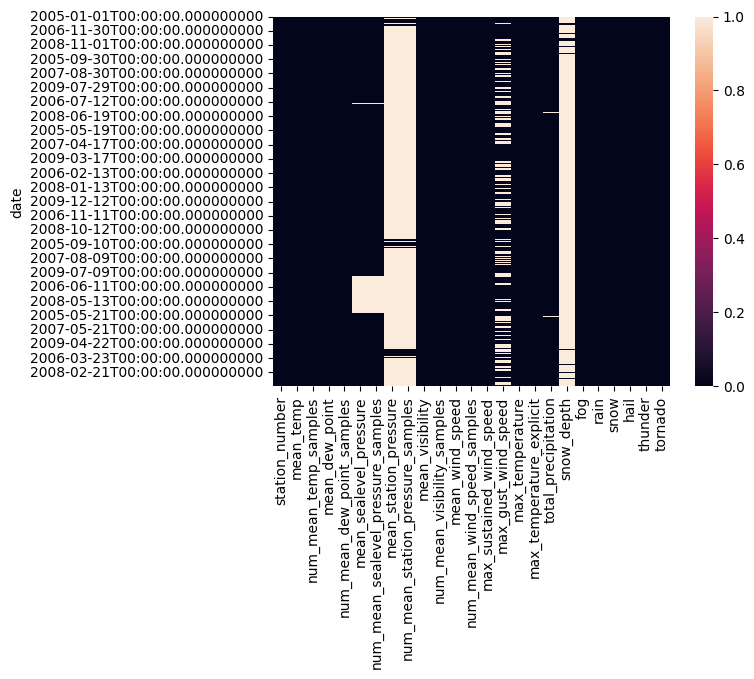

In [9]:
# We then proceed to analyse the missing data by station number and date

for key, group in weather_data_1.groupby(['station_number']):
    print(f'Temperature data for station {key} is missing for {weather_data_1.index.nunique() - len(group.mean_temp)} day(s)')
# We try to visualize the golbal missing data to understand each variable
sns.heatmap(weather_data_1.isnull())

#snow_depth is mostly missing in the dataset, though it signals a strong relationship with our final prediction, so we will keep it
#The rest of the variables are missing in a similar way, so we will drop them



In [10]:
weather_data_1.isnull().sum()
#Check missing data by station number
#for station_number, group in weather_data_1.groupby('station_number'):
 #   missing_data_sum[station_number] = group.isnull().sum()

#We can see that each station is missing data in a similar way, so we will drop some columns

weather_data_1.drop(['mean_sealevel_pressure','num_mean_sealevel_pressure_samples' ,'mean_station_pressure', 'num_mean_station_pressure_samples',
'mean_visibility', 'mean_wind_speed', 'max_gust_wind_speed', 'max_temperature_explicit',
'num_mean_temp_samples','mean_dew_point','num_mean_dew_point_samples','num_mean_visibility_samples','num_mean_wind_speed_samples'], axis=1, inplace=True)



/var/folders/c1/t5fkfr595z347dnt3qpgv4qm0000gn/T/ipykernel_5045/2313636293.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data_1.drop(['mean_sealevel_pressure','num_mean_sealevel_pressure_samples' ,'mean_station_pressure', 'num_mean_station_pressure_samples',


In [11]:
#Interpolate the missing data by using the closest values available
weather_data_1.isna().sum()

station_number                  0
mean_temp                       0
max_sustained_wind_speed       10
max_temperature                 2
total_precipitation           191
snow_depth                  17564
fog                             0
rain                            0
snow                            0
hail                            0
thunder                         0
tornado                         0
dtype: int64

In [12]:

#Interpolate the missing data by using the closest values available
weather_data_1['max_sustained_wind_speed'].interpolate(method='nearest', limit_direction='both', inplace=True)
weather_data_1['max_temperature'].interpolate(method='nearest', limit_direction='both', inplace=True)
weather_data_1['total_precipitation'].interpolate(method='nearest', limit_direction='both', inplace=True)

# For snow_depth, we asume that if there is no snow_depth, there is no snow, so we will fill the missing values with 0
weather_data_1['snow_depth'].fillna(0, inplace=True)


# It's more likely to snow on winter months, so we add a variable to indicate if it's winter or not
weather_data_1['is_winter'] = weather_data_1.index.month.isin([12,1,2]).astype(int)

/var/folders/c1/t5fkfr595z347dnt3qpgv4qm0000gn/T/ipykernel_5045/2123285295.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data_1['max_sustained_wind_speed'].interpolate(method='nearest', limit_direction='both', inplace=True)
/var/folders/c1/t5fkfr595z347dnt3qpgv4qm0000gn/T/ipykernel_5045/2123285295.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data_1['max_temperature'].interpolate(method='nearest', limit_direction='both', inplace=True)
/var/folders/c1/t5fkfr595z347dnt3qpgv4qm0000gn/T/ipykernel_5045/2123285295.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

<Axes: >

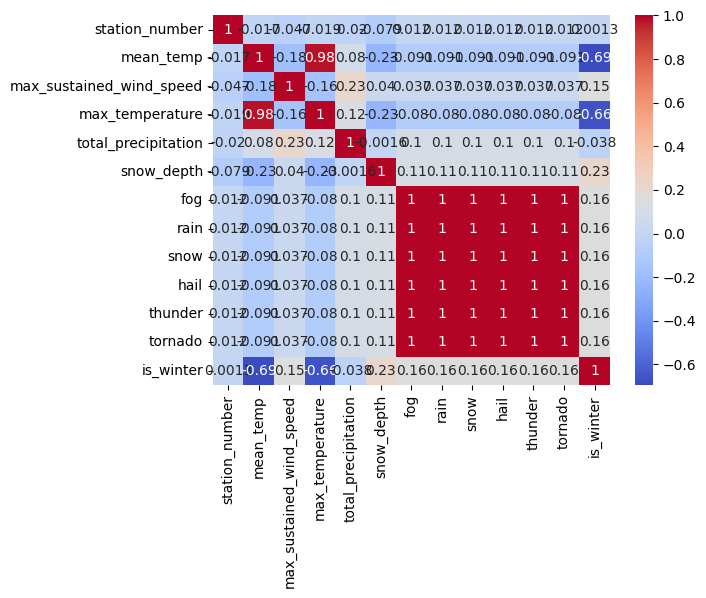

In [13]:
correlation_matrix = weather_data_1.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

With this simple correlation matrix we can identify some important variables that can explain if it will snow on any given day. Note that fog, rain, snow, etc are categorical variables and require another type of correlation calculation. 

In [14]:
weather_data_1.drop(['fog','rain','hail','thunder','tornado'], axis=1, inplace=True)



/var/folders/c1/t5fkfr595z347dnt3qpgv4qm0000gn/T/ipykernel_5045/2289974552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data_1.drop(['fog','rain','hail','thunder','tornado'], axis=1, inplace=True)


In [32]:
snow_count = weather_data_1.groupby('station_number')['snow'].value_counts()#.plot(kind='bar', figsize=(20,10))
print(snow_count)


station_number  snow
725300          0       1606
                1        216
725305          0       1591
                1        233
725314          0       1603
                1        197
725315          0       1615
                1        209
725316          0       1657
                1        167
725317          0       1637
                1        185
725320          0       1509
                1        315
725326          0       1785
725327          0       1514
                1        267
725330          0       1470
                1        353
Name: count, dtype: int64


<Axes: xlabel='date'>

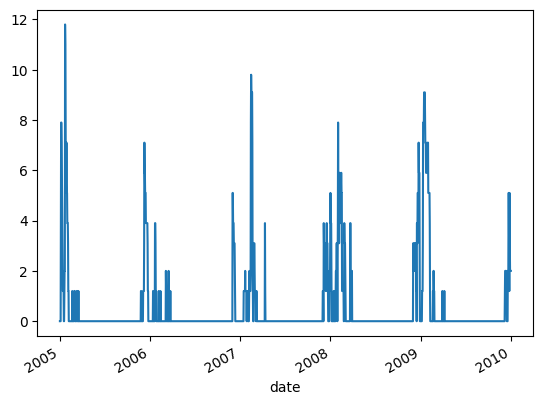

In [46]:
weather_data_1.loc[weather_data_1['station_number']==725300]['snow_depth'].plot()

### 3. Task
Now it is time to split the data, into a training, evaluation and test set. As a reminder, the date we are trying to predict snow fall for should constitute your test set.

In [32]:
import datetime as dt

today_14_ago= str(dt.datetime.today()- dt.timedelta(days=14*365)).split(' ')[0]
a_week_ago_12_years_ago = str(dt.datetime.today()- dt.timedelta(days=12*365) - dt.timedelta(days=8)).split(' ')[0]


In [33]:
#Turn the dataset into a multi-index time series
weather_data_indexed = weather_data_1.set_index(['station_number', weather_data_1.index])
weather_data_indexed= weather_data_indexed.sort_values(by=['date','station_number'], ascending=True)

In [34]:
# We want to split the dataset into train, test and evaluation sets. Since we want to predict the snowfall for the next day, we can use 
# the data from 2005 to October 2008 as train data, the month of November 2008 as evaluation data, and the test set as December 2008 through November 23 2009, 
#so that we have the 24th of as the day we want to predict

train_set = weather_data_indexed.loc[weather_data_indexed.index.get_level_values('date') < "2008-11-01"]
evaluation_set = weather_data_indexed.loc[("2008-11-01"<= weather_data_indexed.index.get_level_values('date')) &(weather_data_indexed.index.get_level_values('date') < "2008-12-01")]
test_set = weather_data_indexed.loc[("2008-12-01"<= weather_data_indexed.index.get_level_values('date')) &(weather_data_indexed.index.get_level_values('date') < today_14_ago)]



train_X = train_set.drop('snow', axis=1).reset_index(drop=True)
train_y = train_set['snow'].reset_index(drop=True)

test_X = test_set.drop('snow', axis=1).reset_index(drop=True)
test_y = test_set['snow'].reset_index(drop=True)

evaluation_X = evaluation_set.drop('snow', axis=1).reset_index(drop=True)
evaluation_y = evaluation_set['snow'].reset_index(drop=True)


## Part 2
If you made it up to here all by yourself, you can use your prepared dataset to train an algorithm of your choice to forecast whether it will snow on the following date for each station in this dataset:

In [35]:
import datetime as dt

str(dt.datetime.today()- dt.timedelta(days=14*365)).split(' ')[0]

'2009-12-07'

You are allowed to use any library you are comfortable with such as sklearn, tensorflow, keras etc. 
If you did not manage to finish part one feel free to use the data provided in 'coding_challenge.csv' Note that this data does not represent a solution to Part 1. 

In [36]:
window_size = 1
def prepare_data(train_X, train_y, window_size):
    X = []
    y = []
    for i in range(len(train_X) - window_size):
        X.append(train_X[i:i+window_size])
        y.append(train_y[i+window_size])
    X = np.array(X)
    y = np.array(y)
    return X, y
#train_X, train_y = prepare_data(train_X, train_y, window_size)
#test_X, test_y = prepare_data(test_X, test_y, window_size)
#evaluation_X, evaluation_y = prepare_data(evaluation_X, evaluation_y, window_size)

In [ ]:
def apply_to_each_station(dataset):
    for station_number in dataset['station_number'].unique():
        # We want to split the dataset into train, test and evaluation sets. Since we want to predict the snowfall for the next day, we can use 
        # the data from 2005 to October 2008 as train data, the month of November 2008 as evaluation data, and the test set as December 2008 through November 23 2009, 
        #so that we have the 24th of as the day we want to predict

        train_set = weather_data_indexed.loc[weather_data_indexed.index.get_level_values('date') < "2008-11-01"]
        evaluation_set = weather_data_indexed.loc[("2008-11-01"<= weather_data_indexed.index.get_level_values('date')) &(weather_data_indexed.index.get_level_values('date') < "2008-12-01")]
        test_set = weather_data_indexed.loc[("2008-12-01"<= weather_data_indexed.index.get_level_values('date')) &(weather_data_indexed.index.get_level_values('date') < today_14_ago)]



        train_X = train_set.drop('snow', axis=1).reset_index(drop=True)
        train_y = train_set['snow'].reset_index(drop=True)

        test_X = test_set.drop('snow', axis=1).reset_index(drop=True)
        test_y = test_set['snow'].reset_index(drop=True)

        evaluation_X = evaluation_set.drop('snow', axis=1).reset_index(drop=True)
        evaluation_y = evaluation_set['snow'].reset_index(drop=True)

        # Code cells to apply to each station number
        train_X, train_y = prepare_data(train_X, train_y, window_size)
        test_X, test_y = prepare_data(test_X, test_y, window_size)
        evaluation_X, evaluation_y = prepare_data(evaluation_X, evaluation_y, window_size)


        # Build the LSTM model
        model = tf.keras.Sequential([
            tf.keras.layers.LSTM(365, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True),
            tf.keras.layers.LSTM(365,return_sequences=False ),
            tf.keras.layers.Dense(1, activation='softmax')  # Adjust the number of units and activation function as needed
        ])

        # Compile the model
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', AUC()])

        # Train the model
        model.fit(train_X, train_y, epochs=15, batch_size=32, validation_data=(evaluation_X, evaluation_y))

        # Evaluate the model
        loss, accuracy , auc = model.evaluate(evaluation_X, evaluation_y)
        print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}, Test AUC: {auc:.4f}')

        

# Call the function with your dataset
apply_to_each_station(weather_data_1)


In [22]:

# Build the LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(365, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True),
    tf.keras.layers.LSTM(365,return_sequences=False ),
    tf.keras.layers.Dense(1, activation='softmax')  # Adjust the number of units and activation function as needed
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', AUC()])

# Train the model
model.fit(train_X, train_y, epochs=15, batch_size=32, validation_data=(evaluation_X, evaluation_y))

# Evaluate the model
loss, accuracy , auc = model.evaluate(evaluation_X, evaluation_y)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}, Test AUC: {auc:.4f}')

Epoch 1/15


/Users/danielbustillo/Documents/GitHub/codingchallenge/.coding/lib/python3.11/site-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


435/435 [==============================] - 4s 6ms/step - loss: 0.0000e+00 - accuracy: 0.1236 - auc: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.0669 - val_auc: 0.5000
Epoch 2/15
435/435 [==============================] - 2s 5ms/step - loss: 0.0000e+00 - accuracy: 0.1236 - auc: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.0669 - val_auc: 0.5000
Epoch 3/15
435/435 [==============================] - 2s 5ms/step - loss: 0.0000e+00 - accuracy: 0.1236 - auc: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.0669 - val_auc: 0.5000
Epoch 4/15
435/435 [==============================] - 2s 5ms/step - loss: 0.0000e+00 - accuracy: 0.1236 - auc: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.0669 - val_auc: 0.5000
Epoch 5/15
435/435 [==============================] - 2s 5ms/step - loss: 0.0000e+00 - accuracy: 0.1236 - auc: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.0669 - val_auc: 0.5000
Epoch 6/15
435/435 [==============================] - 2s 6ms/step - loss: 0.0000e+00 - accuracy: 0.12

In [55]:
for station in weather_data_1['station_number'].unique():
    print(f'For station: {station}, the average snowfall is {weather_data_1.loc[weather_data_1["station_number"] == station]["snow"].mean()}')

For station: 725300, the average snowfall is 0.11855104281009879
For station: 725305, the average snowfall is 0.12774122807017543
For station: 725314, the average snowfall is 0.10944444444444444
For station: 725315, the average snowfall is 0.11458333333333333
For station: 725316, the average snowfall is 0.09155701754385964
For station: 725317, the average snowfall is 0.10153677277716795
For station: 725320, the average snowfall is 0.17269736842105263
For station: 725326, the average snowfall is 0.0
For station: 725327, the average snowfall is 0.14991577765300393
For station: 725330, the average snowfall is 0.1936368623148656


In [62]:
station_1 = weather_data_1.loc[weather_data_1["station_number"] == 725300]


In [64]:
station_1

,station_number,mean_temp,max_sustained_wind_speed,max_temperature,total_precipitation,snow_depth,snow,is_winter
date,,,,,,,,
2005-01-01,725300,32.099998,14.0,24.799999,0.00,0.0,0,1
2005-01-02,725300,42.799999,14.0,25.200001,0.25,0.0,1,1
2005-01-03,725300,34.599998,14.0,33.099998,0.09,0.0,1,1
2005-01-04,725300,32.299999,12.0,30.000000,0.34,0.0,1,1
2005-01-05,725300,29.700001,20.0,26.600000,0.16,3.9,1,1
...,...,...,...,...,...,...,...,...
2009-12-27,725300,20.299999,12.0,17.100000,0.05,3.1,0,1
2009-12-28,725300,22.799999,20.0,14.000000,0.01,2.0,0,1
2009-12-29,725300,17.100000,9.9,8.100000,0.00,2.0,0,1


In [88]:
train_set = station_1.loc[station_1.index.get_level_values('date') < "2008-11-01"]
evaluation_set = station_1.loc[("2008-11-01"<= station_1.index.get_level_values('date')) &(station_1.index.get_level_values('date') < "2008-12-01")]
test_set = station_1.loc[("2008-12-01"<= station_1.index.get_level_values('date')) &(station_1.index.get_level_values('date') < today_14_ago)]



In [89]:
train_X = train_set.drop(['snow','station_number'], axis=1).reset_index(drop=True)
train_y = train_set['snow'].reset_index(drop=True)

test_X = test_set.drop(['snow','station_number'], axis=1).reset_index(drop=True)
test_y = test_set['snow'].reset_index(drop=True)

evaluation_X = evaluation_set.drop(['snow','station_number'], axis=1).reset_index(drop=True)
evaluation_y = evaluation_set['snow'].reset_index(drop=True)

In [84]:
window_size = 1
def prepare_data(train_X, train_y, window_size):
    X = []
    y = []
    for i in range(len(train_X) - window_size):
        X.append(train_X[i:i+window_size])
        y.append(train_y[i+window_size])
    X = np.array(X)
    y = np.array(y)
    return X, y
train_X, train_y = prepare_data(train_X, train_y, window_size)
test_X, test_y = prepare_data(test_X, test_y, window_size)
evaluation_X, evaluation_y = prepare_data(evaluation_X, evaluation_y, window_size)

In [87]:

# Build the LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(365, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True),
    tf.keras.layers.LSTM(365,return_sequences=False ),
    tf.keras.layers.Dense(1, activation='softmax')  # Adjust the number of units and activation function as needed
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', AUC()])

# Train the model
model.fit(train_X, train_y, epochs=15, batch_size=32, validation_data=(evaluation_X, evaluation_y))

# Evaluate the model
loss, accuracy , auc = model.evaluate(evaluation_X, evaluation_y)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}, Test AUC: {auc:.4f}')

Epoch 1/15


/Users/danielbustillo/Documents/GitHub/codingchallenge/.coding/lib/python3.11/site-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


44/44 [==============================] - 2s 17ms/step - loss: 0.0000e+00 - accuracy: 0.1355 - auc_6: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_auc_6: 0.0000e+00
Epoch 2/15
44/44 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.1355 - auc_6: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_auc_6: 0.0000e+00
Epoch 3/15
44/44 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.1355 - auc_6: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_auc_6: 0.0000e+00
Epoch 4/15
44/44 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.1355 - auc_6: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_auc_6: 0.0000e+00
Epoch 5/15
44/44 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.1355 - auc_6: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_auc_6: 0.0000e+00
Epoch 6/15
44/44 [==============================] 